In [32]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import pandas as pd
import folium
from folium import IFrame
import base64

In [49]:
#Section that creates the map
data = pd.DataFrame({
   'lat':[111, 140, -110, -135, -37, 122, 123, 126,-9,5,123,-175,-112],
   'lon':[12, 36, 22, 53, -14, 24, 23, 33,55,57,30,60,24],
   'name':['Vietnam', 'Japan', 'Mexico', 'Canada', 'Brazil', 'Taiwan', 
           'Taiwan', 'Korea','Scotland','Norway','China','Arctic','Mexico'],
   'value':[0.21,0.212,0.032,0.25,0.06,0.25,0.033,0.085,0.091,0.02,0.11,0.22,0.09]
})
data
 
# Make an empty map
m = folium.Map(location=[20,-20],
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/tile/{z}/{y}/{x}',
    attr='Tiles &copy; Esri &mdash; Source: Esri, DeLorme, NAVTEQ, USGS, Intermap, iPC, NRCAN, Esri Japan, METI, Esri China (Hong Kong), Esri (Thailand), TomTom, 2012',
    zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['lon'], data.iloc[i]['lat']],
      popup=str(data.iloc[i]['value'])+' ppm',
      radius=data.iloc[i]['value']*1000000.0,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)

resolution, width, height = 75, 10, 4

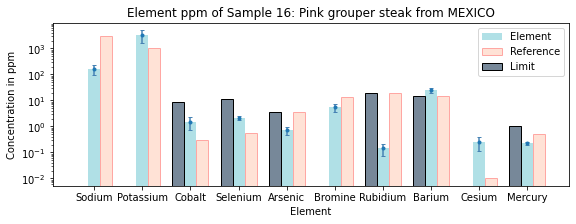

In [50]:
#Section that creates the first chart
#0.25-canada-shortraker steak
station = '42'

elements = ['Sodium', 'Potassium', 'Cobalt','Selenium', 'Arsenic', 'Bromine',
            'Rubidium', 'Barium', 'Cesium', 'Mercury']

ppm = [164.3, 3322.37, 1.52, 2.10, 0.7, 5.5, 0.144, 25.22, 0.25, 0.22]
x = np.linspace(1,len(ppm),len(ppm))
sys_unc = [70.72, 1700.69, 0.77, 0.2, 0.21, 1.8, 0.069, 2.03, 0.1, 0.027]
stat_unc = [7.94, 88.56, 0.11, 0.25, 0.081, 0.13, 0.014, 5.3, 0.091, 0.0065]
tot_unc = []
for i in x:
    val = (sys_unc[int(i)-1]**2+stat_unc[int(i)-1]**2)**0.5
    tot_unc.append(val)

mpl_fig = plt.figure(figsize=(9.25,3))
ax = mpl_fig.add_subplot(111)
w=0.25
p1 = ax.bar(x, ppm, w, color='powderblue', label='Element')

#reference values (based on averages)
ppm2 = [3000, 1000, 0.3, 0.58, 3.5, 13, 20, 14.3, 0.01, 0.514]

#regulatory limits for the elements
limits = [0, 0, 8.48, 11.3, 3.5, 0, 20, 14.3, 0.0, 1]

#reference graph
p2 = ax.bar(x+0.25, ppm2, w, color='lightsalmon', edgecolor='red', alpha=0.3, label='Reference')
#error bars
p3 = plt.errorbar(x, ppm, yerr=tot_unc, fmt='.', ecolor='steelblue', capthick=1, capsize=2)
#limits graph
p4 = ax.bar(x-0.25, limits, w, color='lightslategray', edgecolor='k', label='Limit')

plt.xlabel('Element')
plt.ylabel('Concentration in ppm')
plt.title('Element ppm of Sample 16: Pink grouper steak from MEXICO')
plt.legend()
plt.xticks(x, elements)
ax.set_yscale('log')

png = 'mpld3_{}.png'.format(station)
#mpl_fig.savefig(png, dpi=resolution)

#encoded = base64.b64encode(open(png, 'rb').read()).decode()

encoded = base64.b64encode(open('html/shortRaker.jpeg', 'rb').read()).decode()


In [51]:
#Section that places the first pop up on the map
html="""
    <body style="border:3px; border-style:solid; border-color:navy; padding: 1em;">
    <center><h3>Shortraker Steak </h3></center>
    <p style="float: left; padding: 1px 30px 1px 1px">
    <img src="data:image/jpeg;base64,{}" style="width:200px;height:150px;" alt="Canada Concentrations">
    </p>
    <p style="padding: 1px 1px 10px 1px">
    <ul>
        <li><b>Location:</b> Canada</li>
        <li><b>Average size:</b> about 20 kg </li>
        <li><b>Concentration:</b> 0.25 ppm</li>
        <li><b>Limit:</b> not available</li>
    </ul>
    </p>
    <p>
        Some of the richest sources of cesium are located in Canada. After studying the quantity of 
        Cs-137 in the samples, it was concluded that the Cs-134 detected was purely from irradiated
        133. 
    </p>
    </body>
    """.format
iframe = IFrame(html(encoded), width=(width*resolution), height=(height*resolution))
popup = folium.Popup(iframe, max_width=2650, min_size=(width*resolution))

folium.Marker([53,-135], popup=popup).add_to(m)
m.save('html/CesiumMap.html')

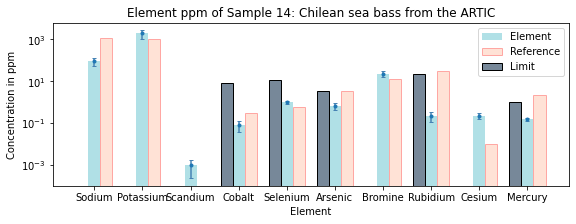

In [52]:
#Second chart-arctic chilean sea bass
resolution, width, height = 75, 9.5, 5

elements = ['Sodium', 'Potassium', 'Scandium', 'Cobalt', 'Selenium', 'Arsenic',
           'Bromine', 'Rubidium', 'Cesium', 'Mercury']

ppm = [91.89, 1930.47, 0.001, 0.08, 0.96, 0.64, 23.19, 0.22, 0.22, 0.15]
x = np.linspace(1,len(ppm),len(ppm))
sys_unc = [40.3, 834.62, 0.0007, 0.04, 0.092, 0.19, 6.97, 0.1, 0.067, 0.018]
stat_unc = [1.93, 123.31, 0.00034, 0.012, 0.057, 0.099, 3.75, 0.027, 0.025, 0.0079]
tot_unc = []
for i in x:
    val = (sys_unc[int(i)-1]**2+stat_unc[int(i)-1]**2)**0.5
    tot_unc.append(val)

mpl_fig = plt.figure(figsize=(9.25,3))
ax = mpl_fig.add_subplot(111)
w=0.25
p1 = ax.bar(x, ppm, w, color='powderblue', label='Element')

#reference values (based on averages)
ppm2 = [1120, 1000, 0, 0.3, 0.58, 3.5, 13, 30, 0.01, 2.18]

#regulatory limits for the elements
limits = [0, 0, 0, 8.48, 11.3, 3.5, 0, 23, 0, 1]

#reference graph
p2 = ax.bar(x+0.25, ppm2, w, color='lightsalmon', edgecolor='red', alpha=0.3, label='Reference')
#error bars
p3 = plt.errorbar(x, ppm, yerr=tot_unc, fmt='.', ecolor='steelblue', capthick=1, capsize=2)
#limits graph
p4 = ax.bar(x-0.25, limits, w, color='lightslategray', edgecolor='k', label='Limit')

plt.xlabel('Element')
plt.ylabel('Concentration in ppm')
plt.title('Element ppm of Sample 14: Chilean sea bass from the ARTIC')
plt.legend()
plt.xticks(x, elements)
ax.set_yscale('log')

png = 'mpld3_{}.png'.format(station)
#mpl_fig.savefig(png, dpi=resolution)

#encoded = base64.b64encode(open(png, 'rb').read()).decode()

encoded = base64.b64encode(open('html/chileanSeaBass.jpeg', 'rb').read()).decode()


In [53]:
#Second pop up
html="""
    <body style="border:3px; border-style:solid; border-color:navy; padding: 1em;">
    <center><h3>Chilean Sea Bass </h3></center>
    <p style="float: left; padding: 1px 30px 1px 1px">
    <img src="data:image/jpeg;base64,{}" style="width:300px;height:100px;" alt="Arctic Concentrations">
    </p>
    <p style="padding: 1px 1px 10px 1px">
    <ul>
        <li><b>Location:</b> Arctic</li>
        <li><b>Average Size:</b> 40 kg</li>
        <li><b>Concentration:</b> 0.22 ppm</li>
        <li><b>Limit:</b> not available</li>
    </ul>
    </p>
    <p>
        Some of the richest sources of cesium are located in Canada. The sediments around the north Pacific Ocean
        probably contain the traces of the sediments emitted from Canada. This can explain the high cesium-133
        concentrations in this region. 
    </p>
    </body>
    """.format
iframe = IFrame(html(encoded), width=(width*resolution), height=(height*resolution))
popup = folium.Popup(iframe, max_width=2650, min_size=(width*resolution))

folium.Marker([60,-175], popup=popup).add_to(m)
m.save('html/CesiumMap.html')

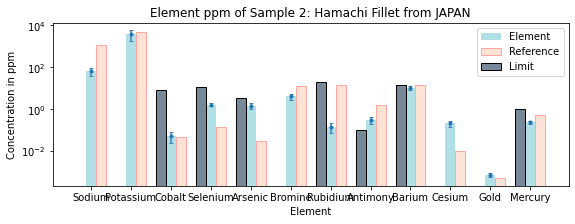

In [54]:
#Third chart
resolution, width, height = 75, 9.5, 5

elements = ['Sodium', 'Potassium', 'Cobalt', 'Selenium', 'Arsenic', 'Bromine',
           'Rubidium', 'Antimony','Barium', 'Cesium', 'Gold', 'Mercury']

ppm = [64.70, 3780.58, 0.052, 1.63, 1.45, 4.15, 0.14, 0.31, 10.48, 0.212, 0.00075, 0.234]
x = np.linspace(1,len(ppm),len(ppm))

sys_unc = [28.48, 1935.24, 0.027, 0.18, 0.43, 1.32, 0.068, 0.08, 1.26, 0.057, 0.00014, 0.029]
stat_unc = [2.06, 790.84, 0.0059, 0.19, 0.14, 0.12, 0.014, 0.07, 1.81, 0.038, 0.00009, 0.031]
tot_unc = []
for i in x:
    val = (sys_unc[int(i)-1]**2+stat_unc[int(i)-1]**2)**0.5
    tot_unc.append(val)

mpl_fig = plt.figure(figsize=(9.25,3))
ax = mpl_fig.add_subplot(111)
w=0.25
p1 = ax.bar(x, ppm, w, color='powderblue', label='Element')

#reference values (based on averages)
ppm2 = [1120, 4912, 0.045, 0.142, 0.03, 13, 14.7, 1.5, 14.3, 0.01, 0.0005, 0.5]

#regulatory limits for the elements
limits = [0, 0, 8.48, 11.3, 3.5, 0, 20, 0.1, 14.3, 0, 0, 1]

#reference graph
p2 = ax.bar(x+0.25, ppm2, w, color='lightsalmon', edgecolor='red', alpha=0.3, label='Reference')
#error bars
p3 = plt.errorbar(x, ppm, yerr=tot_unc, fmt='.', ecolor='steelblue', capthick=1, capsize=2)
#limits graph
p4 = ax.bar(x-0.25, limits, w, color='lightslategray', edgecolor='k', label='Limit')

plt.xlabel('Element')
plt.ylabel('Concentration in ppm')
plt.title('Element ppm of Sample 2: Hamachi Fillet from JAPAN')
plt.legend()
plt.xticks(x, elements)
ax.set_yscale('log')

png = 'mpld3_{}.png'.format(station)
#mpl_fig.savefig(png, dpi=resolution)

#encoded = base64.b64encode(open(png, 'rb').read()).decode()

encoded = base64.b64encode(open('html/hamachi.jpeg', 'rb').read()).decode()


In [55]:
#Third pop up
#0.212-Japan-Hamachi Fillet
html="""
    <body style="border:3px; border-style:solid; border-color:navy; padding: 1em;">
    <center><h3>Hamachi Fillet </h3></center>
    <p style="float: left; padding: 1px 30px 1px 1px">
    <img src="data:image/jpeg;base64,{}" style="width:300px;height:100px;" alt="Japan Concentrations">
    </p>
    <p style="padding: 1px 1px 10px 1px">
    <ul>
        <li><b>Location:</b> Japan</li>
        <li><b>Average size:</b> 4.5 kg</li>
        <li><b>Concentration:</b> 0.212 ppm</li>
        <li><b>Limit:</b> not available</li>
    </ul>
    </p>
    <p>
        After studying the quantity of Cs-137 in the sample, the Cs-134/133 detected was not from Fukushima. The 
        reason why the detected Cs-133 is relatively high compared to its reference is due to its geographical 
        location in the Pacific. The cesium levels in the Pacific are naturally higher than those in the southern 
        and Atlantic regions. 
    </p>
    </body>
    """.format
iframe = IFrame(html(encoded), width=(width*resolution), height=(height*resolution))
popup = folium.Popup(iframe, max_width=2650, min_size=(width*resolution))

folium.Marker([36,140], popup=popup).add_to(m)

m.save('html/CesiumMap.html')


In [56]:
m